In [24]:
print("Lstm Implementation")

Lstm Implementation


In [4]:
import pandas as pd

import pandas as pd

data = pd.read_excel('/content/Electricity_Load_Prediction.xlsx')

missing_values = data.isnull().sum()

print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
Date           0
Hr_End         0
DA_Demand      0
RT_Demand      0
DA_LMP         0
DA_EC          0
DA_CC          0
DA_MLC         0
RT_LMP         0
RT_EC          0
RT_CC          0
RT_MLC         0
Dry_Bulb       0
Dew_Point      0
Reg_Service    0
Price          0
System_Load    0
dtype: int64


In [14]:
import pandas as pd

# Load dataset
electricity_df = pd.read_excel('/content/Cleaned_Electricity_Data.xlsx')

# Convert Hr_End to integer
electricity_df['Hr_End'] = electricity_df['Hr_End'].astype(int)

# Handle DateTime
electricity_df['Datetime'] = pd.to_datetime(electricity_df['Date']) + pd.to_timedelta((electricity_df['Hr_End'] % 24), unit='h')

# Shift to next day where Hr_End == 24
electricity_df.loc[electricity_df['Hr_End'] == 24, 'Datetime'] += pd.Timedelta(days=1)

# Drop old columns
electricity_df.drop(columns=['Date', 'Hr_End'], inplace=True)

# Reorder columns
cols = ['Datetime'] + [col for col in electricity_df.columns if col != 'Datetime']
electricity_df = electricity_df[cols]

print(electricity_df.head())



             Datetime  DA_Demand  RT_Demand  DA_LMP  DA_EC  DA_CC  DA_MLC  \
0 2022-01-01 01:00:00    10845.4  10789.727   32.22  32.35  -0.12   -0.01   
1 2022-01-01 02:00:00    10593.7  10320.195   32.12  32.31  -0.14   -0.05   
2 2022-01-01 03:00:00    10207.3   9972.371   30.76  30.85   0.00   -0.09   
3 2022-01-01 04:00:00    10026.4   9779.883   29.60  29.69   0.00   -0.09   
4 2022-01-01 05:00:00    10283.0   9777.168   30.78  30.86   0.00   -0.08   

   RT_LMP  RT_EC  RT_CC  RT_MLC  Dry_Bulb  Dew_Point  Reg_Service      Price  \
0   25.90  25.95    0.0   -0.05        44         43     0.237500  11.284167   
1   25.87  25.87    0.0    0.00        44         43     0.300000  11.383333   
2   27.51  27.50    0.0    0.01        44         43     0.112500  12.375000   
3   25.14  25.13    0.0    0.01        44         43     0.258333  11.763333   
4   29.28  29.27    0.0    0.01        44         43     0.112500  12.405000   

   System_Load  
0        10983  
1        10510  
2    

Training samples: (23327, 24, 5), Testing samples: (5832, 24, 5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 24, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0142 - val_loss: 0.0017
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - loss: 0.0015 - val_loss: 6.3977e-04
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - loss: 0.0012 - val_loss: 5.8693e-04
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 9.3358e-04 - val_loss: 3.8338e-04
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 7.8696e-04 - val_loss: 6.7364e-04
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 7.0949e-04 - val_loss: 2.9909e-04
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 5.8114e-04 - val_loss: 2.9501e-04
Epoch 9/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 5.3323e-04 - val_loss: 2.8143e-04
Epoch 10/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 4.9600e-04 - val_loss: 2.3713e-04
Epoch 11/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 

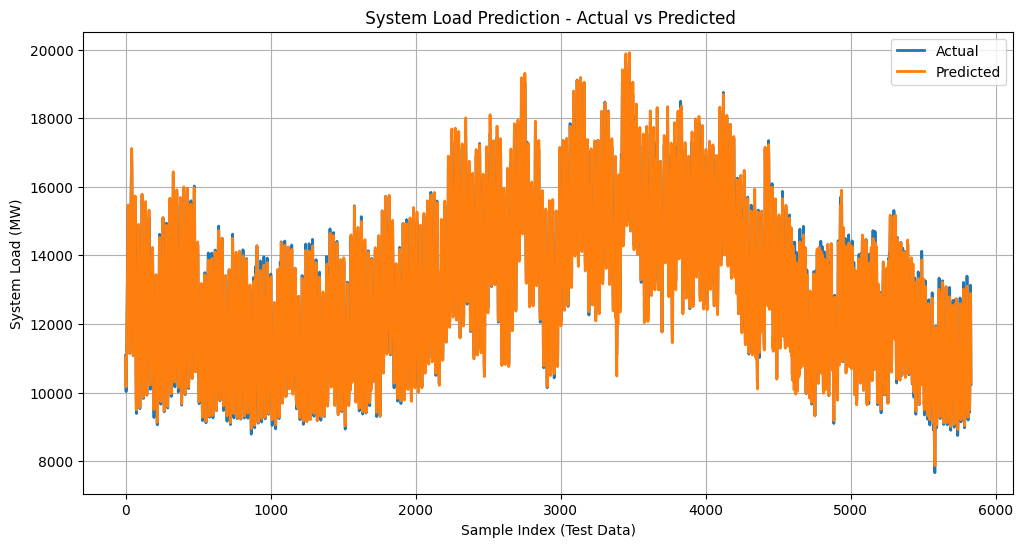

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_percentage_error

# --------------------------- Load Data ---------------------------
df = electricity_df.copy()

# --------------------------- Feature Selection ---------------------------
features = ['DA_Demand', 'RT_Demand', 'DA_LMP', 'RT_LMP', 'Price']
target = 'System_Load'

df = df[['Datetime'] + features + [target]]

# --------------------------- Normalization ---------------------------
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

# --------------------------- Time Series Sequence ---------------------------
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, :-1])
        y.append(data[i, -1])
    return np.array(X), np.array(y)

time_steps = 24  # last 24 hours predict next hour
X, y = create_sequences(scaled_data, time_steps)

# --------------------------- Train Test Split ---------------------------
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f'Training samples: {X_train.shape}, Testing samples: {X_test.shape}')

# --------------------------- LSTM Model ---------------------------
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# --------------------------- Train Model ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
    verbose=1
)

# --------------------------- Evaluation ---------------------------
y_pred = model.predict(X_test)
y_test_inv = y_test * scaler.data_range_[-1] + scaler.data_min_[-1]
y_pred_inv = y_pred.flatten() * scaler.data_range_[-1] + scaler.data_min_[-1]

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) * 100
print(f' RMSE: {rmse:.2f}')
print(f' MAE: {mae:.2f}')
print(f' MAPE: {mape:.2f}%')
average_load = np.mean(y_test_inv)

# --------------------------- Visualization ---------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual', linewidth=2)
plt.plot(y_pred_inv, label='Predicted', linewidth=2)
plt.title(' System Load Prediction - Actual vs Predicted')
plt.xlabel('Sample Index (Test Data)')
plt.ylabel('System Load (MW)')
plt.legend()
plt.grid()
plt.show()

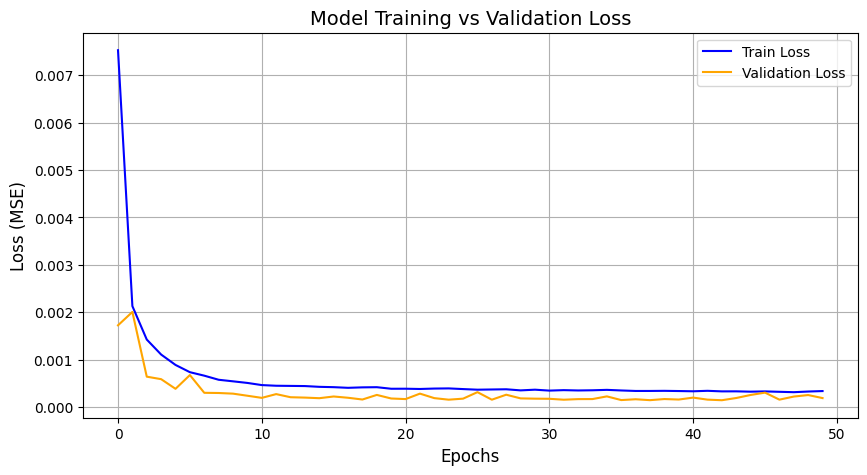

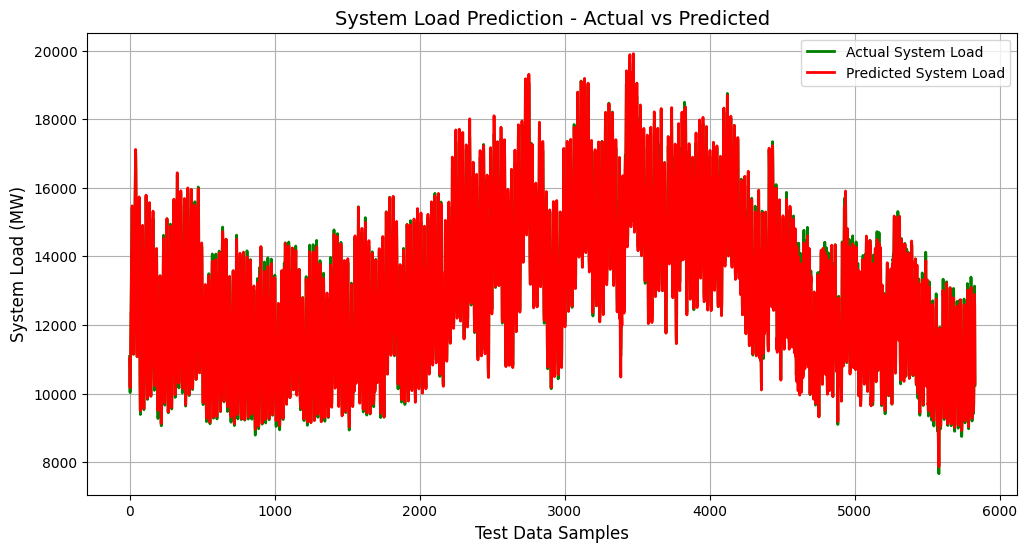

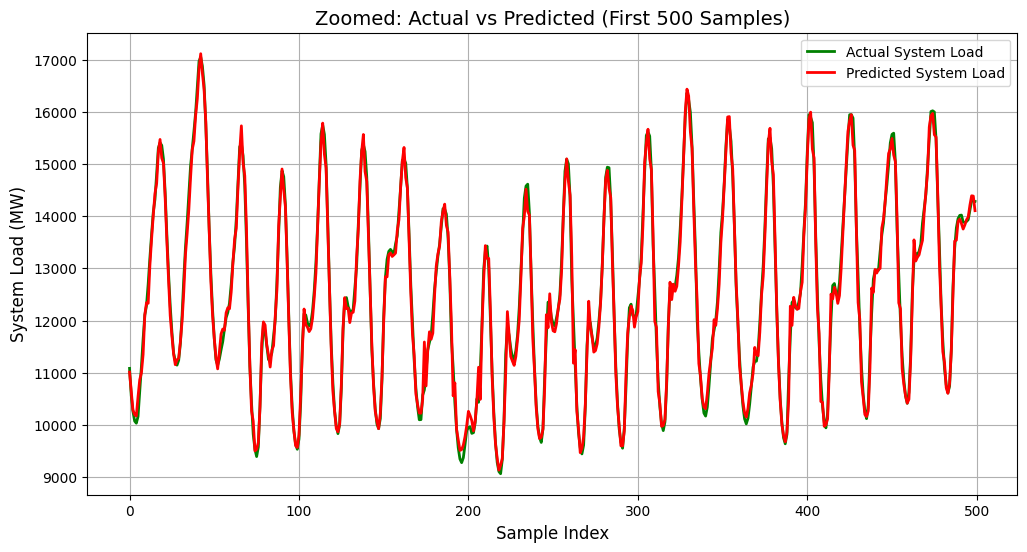

In [23]:
import matplotlib.pyplot as plt

# --------------------------- LOSS CURVE ---------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Training vs Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --------------------------- ACTUAL vs PREDICTED ---------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual System Load', color='green', linewidth=2)
plt.plot(y_pred_inv, label='Predicted System Load', color='red', linewidth=2)
plt.title('System Load Prediction - Actual vs Predicted', fontsize=14)
plt.xlabel('Test Data Samples', fontsize=12)
plt.ylabel('System Load (MW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# --------------------------- ZOOMED-IN ACTUAL vs PREDICTED (first 500 samples) ---------------------------
plt.figure(figsize=(12,6))
plt.plot(y_test_inv[:500], label='Actual System Load', color='green', linewidth=2)
plt.plot(y_pred_inv[:500], label='Predicted System Load', color='red', linewidth=2)
plt.title('Zoomed: Actual vs Predicted (First 500 Samples)', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('System Load (MW)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
